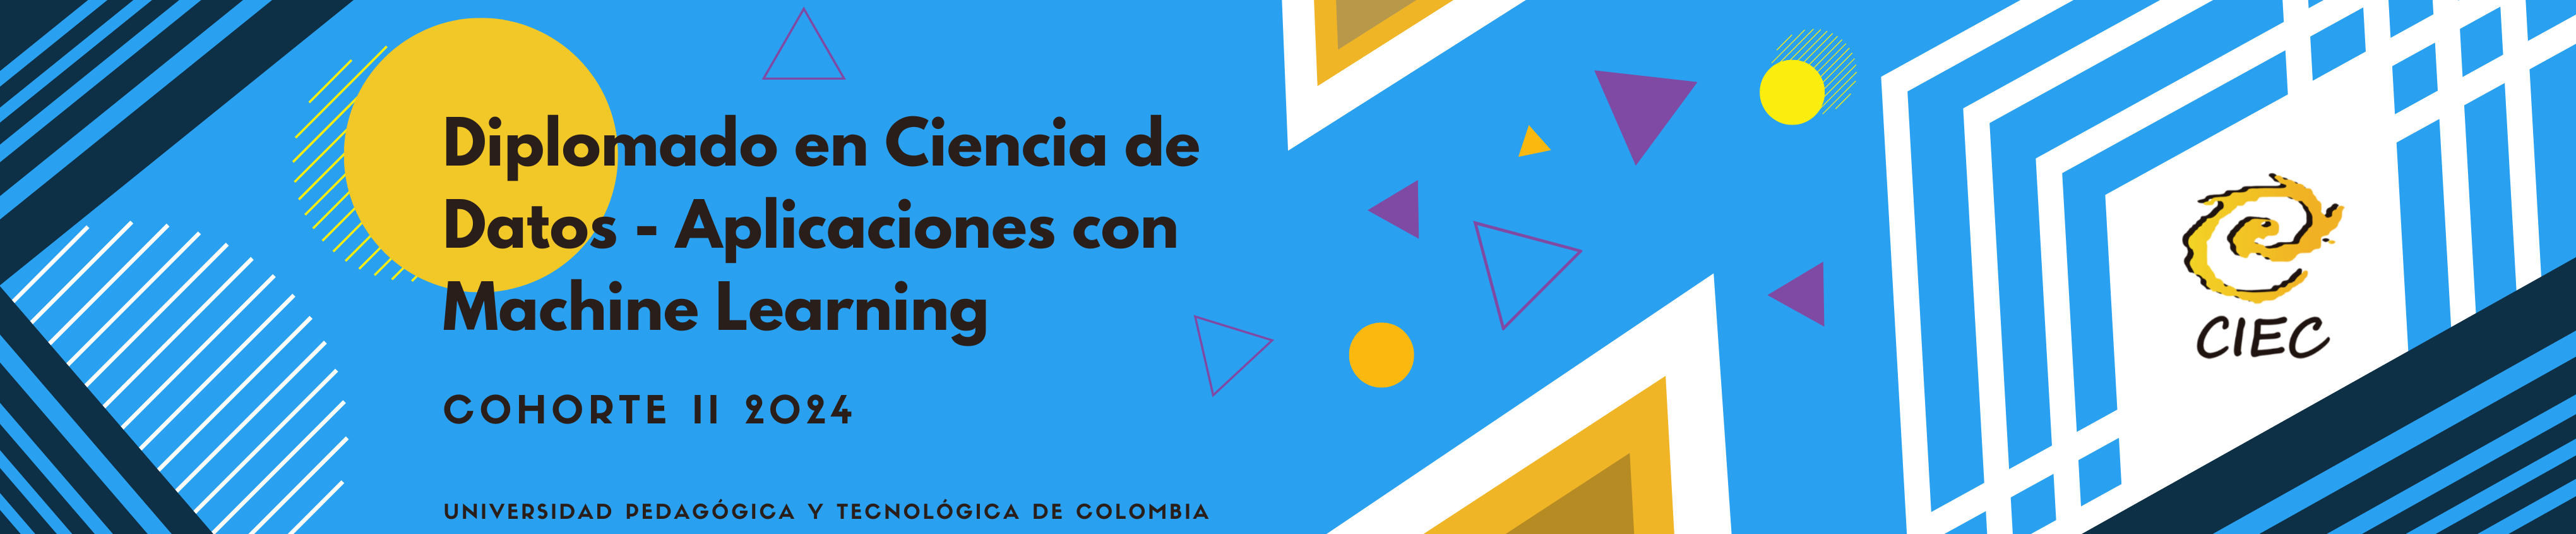

<!-- Main Title -->

**<h1 style="color: #FECB05; text-align: center;"> Regresión Logística II: Explicación Técnica </h1>**

---

**<h2 style="color: #007ACC;">Autores</h2>**

- [Andrés Felipe Flórez Olivera](https://www.linkedin.com/in/felipeflorezo/)

---

## 1. Introducción
La **regresión logística** es un modelo utilizado para resolver problemas de clasificación binaria. A diferencia de la regresión lineal, la regresión logística predice una probabilidad que se convierte en una clasificación de una clase (por ejemplo, 0 o 1). Este modelo es ampliamente utilizado cuando el objetivo es predecir categorías o eventos discretos (como "spam" o "no spam").

## 2. Aspectos Matemáticos

La **función sigmoide** es clave en la regresión logística. Transforma una salida continua en una probabilidad en el rango [0, 1]. Matemáticamente, la función sigmoide se define como:

$$
h_{\theta}(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

Donde:
- \( x \) es el vector de características de una muestra.
- \( \theta \) son los coeficientes del modelo que vamos a aprender.
- \( h_{\theta}(x) \) es la probabilidad predicha de que la muestra pertenezca a la clase 1.

El objetivo de la regresión logística es encontrar los valores de \( \theta \) que minimizan la función de **costo logarítmica**. La función de costo se define como:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right]
$$

Donde:
- \( m \) es el número de muestras en el conjunto de datos.
- \( y^{(i)} \) es el valor verdadero de la clase para la muestra \( i \).
- \( h_{\theta}(x^{(i)}) \) es la probabilidad predicha de que \( x^{(i)} \) pertenezca a la clase 1.

## 3. Aspectos Computacionales

Para minimizar la función de costo y obtener los coeficientes \( \theta \), usamos el método de **gradiente descendente**. Este algoritmo actualiza los coeficientes de acuerdo con la dirección del gradiente de la función de costo:

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

Donde:
- \( \alpha \) es la tasa de aprendizaje (learning rate), que controla el tamaño de los pasos de actualización.
- \( \frac{\partial J(\theta)}{\partial \theta_j} \) es el gradiente de la función de costo con respecto a \( \theta_j \).

La derivada parcial de la función de costo con respecto a \( \theta_j \) es:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

Este proceso se repite hasta que la función de costo converge, es decir, hasta que los cambios en \( \theta \) son insignificantes.

## 4. Implementación en Python

Vamos a implementar la regresión logística usando **Scikit-learn** para resolver un problema de clasificación binaria con el dataset de diabetes.


In [ ]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar el dataset de diabetes
!pip install kaggle
!kaggle datasets download -d mathchi/diabetes-data-set
!unzip diabetes-data-set.zip
db_name = 'diabetes.csv'
dataf = pd.read_csv(db_name)

# Separar las variables de entrada (X) y la variable de salida (y)
X = dataf.drop(columns=['Outcome'])
y = dataf['Outcome']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000)

# Entrenar el modelo
log_reg.fit(X_train, y_train)

# Hacer predicciones
y_pred = log_reg.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo de Regresión Logística: {accuracy * 100:.2f}%')

# Coeficientes del modelo
print("Coeficientes del modelo:", log_reg.coef_)
print("Intercepción:", log_reg.intercept_)

Dataset URL: https://www.kaggle.com/datasets/mathchi/diabetes-data-set
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 18.2MB/s]
Archive:  diabetes-data-set.zip
  inflating: diabetes.csv            
Precisión del modelo de Regresión Logística: 74.68%
Coeficientes del modelo: [[ 0.0643716   0.03409435 -0.01387923  0.00329073 -0.00180347  0.10260805
   0.62688582  0.03709701]]
Intercepción: [-9.00683307]


Los **coeficientes** de un modelo de **regresión logística** representan la influencia que tiene cada una de las características del conjunto de datos sobre la probabilidad de que ocurra el evento que estamos tratando de predecir (por ejemplo, si un correo es spam o no, si una persona tiene diabetes o no).

### Interpretación de los Coeficientes:

1. **Signo del coeficiente**:
   - **Positivo**: Si el coeficiente de una característica es positivo (\( \theta_j > 0 \)), un aumento en el valor de esa característica \( x_j \) incrementa la probabilidad de que el resultado sea positivo (o clase 1).
   - **Negativo**: Si el coeficiente es negativo (\( \theta_j < 0 \)), un aumento en el valor de esa característica \( x_j \) disminuye la probabilidad de que el resultado sea positivo.

2. **Magnitud del coeficiente**:
   - **Valor absoluto grande**: Un coeficiente con un valor absoluto alto (por ejemplo, \( |\theta_j| \)) indica que la característica correspondiente tiene una gran influencia en la predicción del modelo.
   - **Valor absoluto pequeño**: Un coeficiente cercano a 0 indica que esa característica tiene poca o ninguna influencia en la probabilidad predicha por el modelo.

3. **Probabilidades y log-odds**:
   Los coeficientes en la regresión logística están relacionados con los **log-odds** (logaritmo de las probabilidades). El modelo predice la probabilidad de que el resultado sea positivo (clase 1), y esta probabilidad está relacionada con los coeficientes de la siguiente manera:
$$
   [
   \log \left( \frac{P(y = 1 | x)}{1 - P(y = 1 | x)} \right) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
   ]
$$
   Donde:
   - \( P(y = 1 | x) \) es la probabilidad de que el resultado sea positivo dado el valor de las características \( x \).
   - \( \theta_0 \) es el **intercepto** o término independiente.
   - \( \theta_1, \theta_2, \dots, \theta_n \) son los coeficientes correspondientes a las características \( x_1, x_2, \dots, x_n \).

4. **Exponenciación de coeficientes**:
   Para interpretar mejor los coeficientes en términos de probabilidades, a menudo exponenciamos los coeficientes. Esto nos da una razón de odds (odds ratio), que indica el cambio multiplicativo en las probabilidades por cada unidad de cambio en la característica. Matemáticamente:
$$
   [
   e^{\theta_j}
   ]
$$
   Esto representa cuánto cambian las probabilidades de que ocurra el evento por un aumento unitario en la característica \( x_j \):
   - Si \( e^{\theta_j} > 1 \), la característica \( x_j \) aumenta la probabilidad del evento.
   - Si \( e^{\theta_j} < 1 \), la característica \( x_j \) disminuye la probabilidad del evento.

### Ejemplo:
Si en un modelo de predicción de diabetes, el coeficiente asociado con el nivel de glucosa es \( \theta_1 = 0.5 \), esto significa que a medida que aumenta el nivel de glucosa, la probabilidad de que una persona tenga diabetes aumenta. Si exponenciamos el coeficiente, \( e^{0.5} \approx 1.65 \), lo que significa que un aumento unitario en el nivel de glucosa multiplica las probabilidades de tener diabetes por 1.65.


## 5. Aspectos Relevantes

### Interpretación de Coeficientes:
Cada coeficiente \( \theta_j \) en la regresión logística se puede interpretar como el impacto del cambio unitario en la característica \( x_j \) sobre la probabilidad de que el resultado sea positivo. Coeficientes grandes indican una mayor influencia.

### Regularización:
En problemas con muchas características, es común agregar un término de regularización \( \lambda \) para evitar el sobreajuste. Esto modifica la función de costo, añadiendo una penalización sobre los valores de \( \theta \):

$$
[
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
]
$$
### Precisión vs Recall:
En problemas de clasificación desbalanceados, es importante evaluar el modelo con métricas adicionales como el **recall** y la **precisión**, ya que la precisión global podría no ser representativa del rendimiento real del modelo.


## 6. Conclusión
La regresión logística es una técnica eficiente y fácil de interpretar para problemas de clasificación binaria. Aunque su base matemática es simple, es muy eficaz en problemas donde las relaciones entre las características y la variable objetivo son lineales. Además, con la posibilidad de añadir regularización, se convierte en una opción versátil para problemas reales.

# Ejemplo 2. Regresión Logística
Entrenaremos usando scikit-learn una regresión logística para clasificar dígitos manuscritos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
np.set_printoptions(suppress=True)  # no usar notacion "e"

## Conjunto de Datos

Usaremos el ["digits dataset"](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) que viene con scikit-learn.


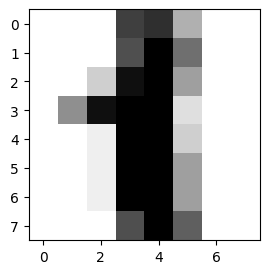

In [3]:
from sklearn import datasets

# Cargamos el dataset entero:
digits = datasets.load_digits()

#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
digits.target[1]

1

In [ ]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [ ]:
# Cargamos sólo vectores X e y:
X, y = datasets.load_digits(return_X_y=True)

In [ ]:
X.shape

(1797, 64)

In [ ]:
# Cuántas imágenes hay para cada dígito?
from collections import Counter

Counter(y)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

## División en Entrenamiento y Evaluación

Dividiremos aleatoriamente los datos en una parte para entrenamiento (80%) y otra para evaluación (20%).

Usaremos
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=0)

In [ ]:
X_train.shape, X_val.shape

((1437, 64), (360, 64))

## Instanciar y Entrenar

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)  # entrenamiento

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Inspeccionar Parámetros

In [ ]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# coef_[i, j] es el score que aporte el feature j a la clase i
model.coef_

array([[ 0.        , -0.00481055, -0.07125191,  0.09967566,  0.03678739,
        -0.09590434, -0.10801524, -0.00931637, -0.00009193, -0.04894419,
        -0.01368792,  0.15079321,  0.08517038,  0.08968538, -0.0371555 ,
        -0.00698259, -0.00002545,  0.04703136,  0.14807468, -0.0261566 ,
        -0.32116716,  0.19757049,  0.09082348, -0.00179109, -0.00001259,
         0.11392941,  0.11830185, -0.19077172, -0.49271053,  0.02846844,
         0.07748874, -0.00042589,  0.        ,  0.13087884,  0.11104784,
        -0.18240873, -0.39935769,  0.02827369,  0.0425763 ,  0.        ,
        -0.00094019, -0.05036513,  0.25935548, -0.1100199 , -0.16961014,
         0.11515413,  0.01738826, -0.00056268, -0.00328804, -0.1000517 ,
         0.08527656, -0.01313448,  0.17065788,  0.08146484, -0.05294094,
        -0.00675119, -0.00001531, -0.00898164, -0.09780433,  0.16501645,
        -0.03330174, -0.07810348, -0.06718667, -0.02569132],
       [ 0.        , -0.01658672, -0.0592345 ,  0.04033491, -0.

In [ ]:
model.coef_[:,0]  # pixel esquina superior izquierda

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
model.coef_[:,3]  # un pixel arriba al medio

array([ 0.09967566,  0.04033491,  0.06812577,  0.08688928, -0.37239082,
       -0.15794507, -0.05069555,  0.13329228, -0.05026028,  0.20297383])

In [ ]:
model.coef_[:,3 + 4 * 8]  # un pixel del medio

array([-0.18240873, -0.18033166, -0.09586155,  0.06172737, -0.1342839 ,
       -0.2234603 ,  0.26506349, -0.07209825,  0.34847403,  0.2131795 ])

In [ ]:
model.intercept_  # bias

array([ 0.00078128, -0.08191362,  0.00472313,  0.00414523,  0.05347982,
        0.00397389, -0.00428581,  0.0111837 ,  0.0539352 , -0.0460228 ])

## Evaluar

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_val)
accuracy_score(y_val, y_pred)

0.9666666666666667

## Predecir

In [ ]:
x = np.array([[ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.]])

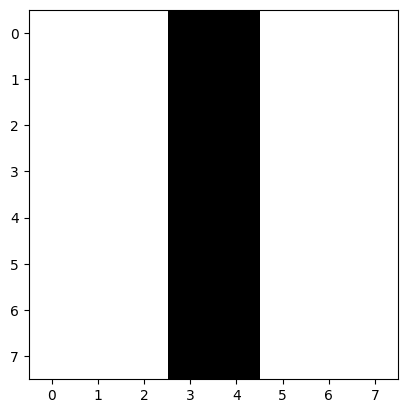

In [ ]:
plt.imshow(x,cmap=plt.cm.gray_r)

In [ ]:
x = x.ravel()  # aplanar la matriz en un vector

In [ ]:
# Clase más probable:
model.predict([x])

array([1])

In [ ]:
# Probabilidad de cada clase (resultado del softmax):
model.predict_proba([x])

array([[0.        , 0.99999174, 0.00000577, 0.00000004, 0.00000043,
        0.        , 0.        , 0.00000006, 0.00000196, 0.        ]])

In [ ]:
model.predict_proba([x]).sum()

0.9999999999999999

In [ ]:
# "Score" para cada clase (antes del softmax):
model.decision_function([x])

array([[-19.68782224,  19.4232613 ,   7.35994847,   2.33943765,
          4.76285859, -15.06308683,  -4.27234374,   2.8252399 ,
          6.28254881,  -3.97004192]])

In [ ]:
# El mismo score a mano:
model.coef_.dot(x) + model.intercept_

array([-19.68782224,  19.4232613 ,   7.35994847,   2.33943765,
         4.76285859, -15.06308683,  -4.27234374,   2.8252399 ,
         6.28254881,  -3.97004192])

## Ejemplo 3. Uso de la regresión logística con un único atributo

Entrenaremos un clasificador de regresión logística utilizando la implementación de Scikit Learn (`sklearn`), y posteriormente visualizaremos el modelo. Para mantener las cosas simples y fáciles de visualizar, empezamos con un conjunto de datos sintéticos con una única variable de entrada o atributo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
def sigmoid_function(x, w0, w1):
    '''Equivalent to a perceptron but with a sigmoid function'''
    z = w0 + w1*x  # note: this is a simple linear function
    y = 1 / (1 + np.exp(-z))  #compute the sigmoid function on the output (z) of the linear function
    return y

En primer lugar, prepararemos nuestro conjunto de datos. En este caso, generaremos un conjunto de datos sintéticos que contenga muestras con un único atributo de entrada, que puede clasificarse como una de las dos clases posibles. Las clases se etiquetan como «0» o «1».

In [ ]:
X, y = make_blobs(
    n_samples=1000, centers=2, n_features=1,
    random_state=1, cluster_std=1.5
)

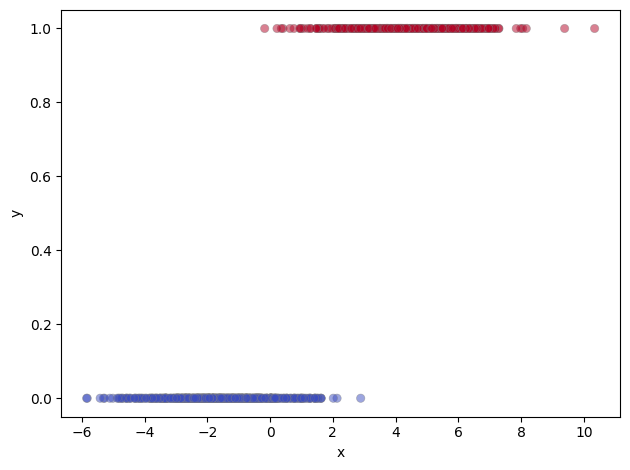

In [ ]:
plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

Como de costumbre, podemos encontrar fácilmente un clasificador de regresión logística navegando por [la documentación de sklearn](https://scikit-learn.org/stable/user_guide.html). En este caso, tenemos la clase `LogisticRegression`, con los métodos `fit` y `predict` para entrenar y realizar la inferencia:

In [ ]:
clf = LogisticRegression().fit(X,y)

In [ ]:
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

0.974

Imprimamos los parámetros del modelo entrenado:

In [ ]:
print(clf.coef_, clf.intercept_)

[[2.44345198]] [-3.38083983]


Utilizando estos parámetros, podemos representar gráficamente la curva obtenida por la regresión logística.

Tenga en cuenta que **no** es el límite de decisión del modelo. En este caso, como sólo tenemos una variable de entrada y una variable de salida, podemos trazar el resultado del modelo para cada entrada posible junto con los datos de entrenamiento.

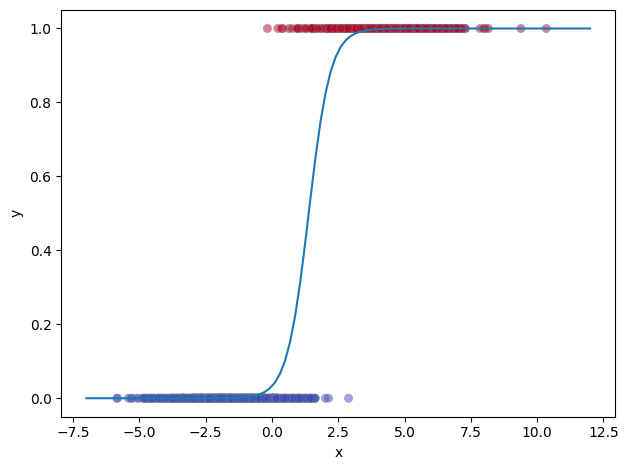

In [ ]:
plt.scatter(X, y, c=y, alpha=0.5, lw=0.5, edgecolor='grey', cmap=cm.coolwarm)

x_plot = np.linspace(-7,12,100)
plt.plot(x_plot, sigmoid_function(x_plot,clf.intercept_[0], clf.coef_[0][0]))

plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

¡También podemos obtener la misma curva utilizando el método `predict_proba` del clasificador, ya que en realidad aplica la misma composición de una función lineal y otra sigmoidea que definimos antes en `sigmoid_function`!


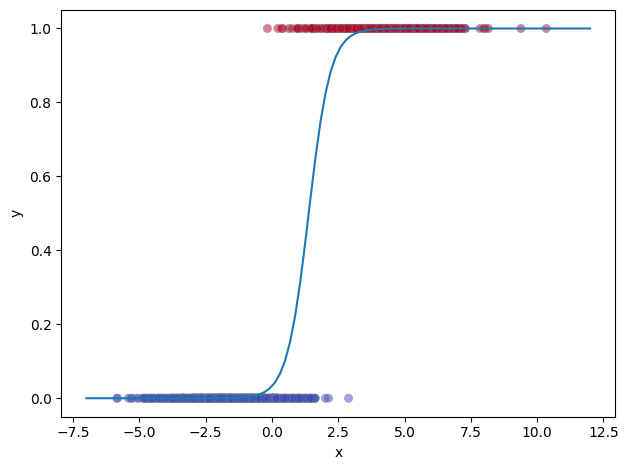

In [ ]:
plt.scatter(X, y, c=y, alpha=0.5, lw=0.5, edgecolor='grey', cmap=cm.coolwarm)

x_plot = np.linspace(-7,12,100)
y_plot = clf.predict_proba(x_plot.reshape(-1,1))[:,1]
plt.plot(x_plot, y_plot)

plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

### 2.2 Regresión logística con dos atributos

En términos de entrenamiento y evaluación del modelo, el caso de dos atributos es exactamente igual. Sin embargo, la visualización de los resultados es un poco más compleja, ya que ahora las variables de entrada se encuentran en un plano 2D. En este caso, la información del color será crucial para visualizar la clase de cada muestra.


In [ ]:
X, y = make_blobs(
    n_samples=1000, centers=2, n_features=2,
    random_state=1, cluster_std=2.0
)

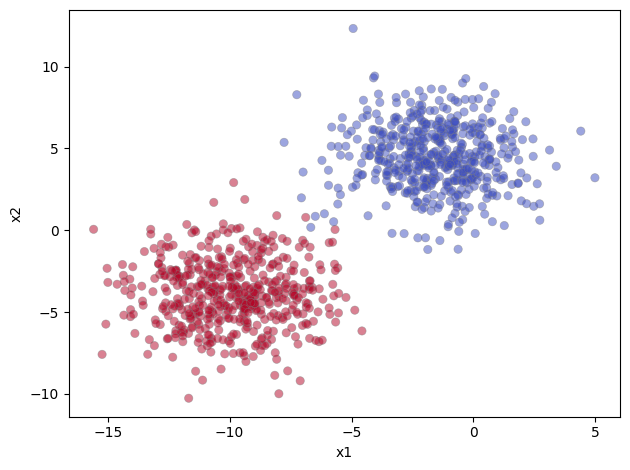

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, lw=0.5, edgecolor='grey', cmap=cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.show()

Entrenemos el modelo y calculemos su error en el conjunto de entrenamiento:


In [ ]:
clf = LogisticRegression().fit(X,y)
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

0.998

Ahora, podemos **trazar los ejemplos así como la frontera de decisión obtenida por el modelo**.


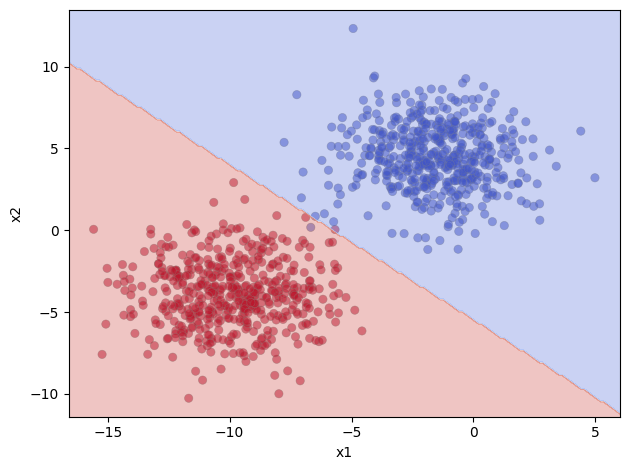

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], c=y, alpha=0.5, lw=0.5, edgecolor='grey', cmap=cm.coolwarm)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(
    np.linspace(*xlim, num=200),
    np.linspace(*ylim, num=200)
)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap=cm.coolwarm)

plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.show()

En el gráfico anterior, utilizamos información de color para representar las probabilidades de salida del modelo. En este caso, podemos representar alternativamente los datos y la función aprendida por el en 3D. En este caso, mantenemos los colores como referencia, pero codifican la misma información que el eje y.



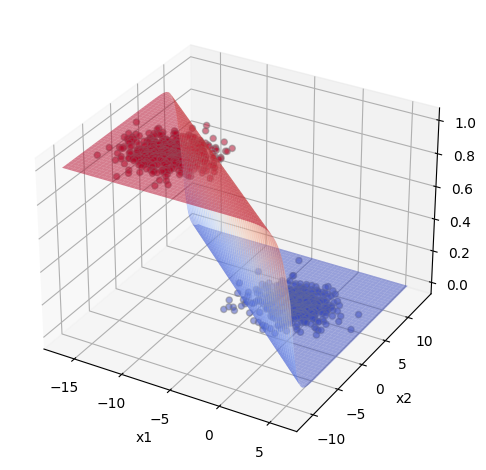

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],y, c=y, alpha=0.5, lw=1, edgecolors='grey', cmap=cm.coolwarm)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = (clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]).reshape(xx.shape)


surf = ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm,
                   linewidth=0, antialiased=True, alpha = 0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

## Proyecto Regresión Logística

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn import preprocessing



In [ ]:
#Apertura de archivo csv a un dataframe de pandas

#revisar la ruta para tu caso particular
ruta = "/content/Social_Network_Ads.csv"
dataset = pd.read_csv(ruta)
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
#Sacar las variables independientes
X = dataset.iloc[:,[2,3]].values

# Sacar la variable dependientes
y = dataset.iloc[:,4].values

In [ ]:
#Division de Datos - entrenamiento y validacion

#herramienta para dividir los datos
from sklearn.model_selection import train_test_split

#divide los datos en 20% para la validacion y se colocar una semilla para hacer la division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Escalado de Variables - Estandarizacion y Normalizacion

#Es preferible utilizalo en algortimos que usan el calculo de distancia - pitagoras

#Estandarizacion
sc_X = preprocessing.StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

#Ajuste de regresion logistica en el conjunto de entrenamiento
clasificador = LogisticRegression(random_state=0)
clasificador.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
#Prediccion de los resultados con el conjusto de testing

y_pre = clasificador.predict(X_test)
#respuesta del modelo
print(y_pre)
#Valores dados por los datos de testing
print(y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [ ]:
#Comprobacion del resultado - Matriz de confucion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pre)
cm

#La diagonal principal,(66,24) son los verdaderos positivos y los verdaderos negativos,
# los datos con una prediccion correcta.

#La diagonal secundaria (3,8), son los falsos positivos y los falsos negativos,
# los datos con una prediccion incorrecta.

array([[65,  3],
       [ 8, 24]])

<ipython-input-52-a0d8a887bb3f>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


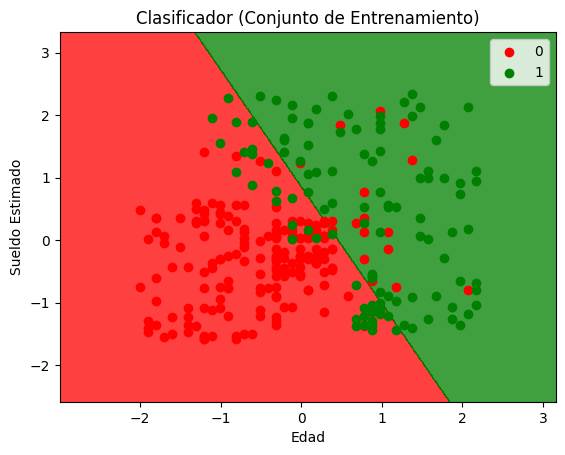

In [ ]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()


<ipython-input-53-d8810f7526b2>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


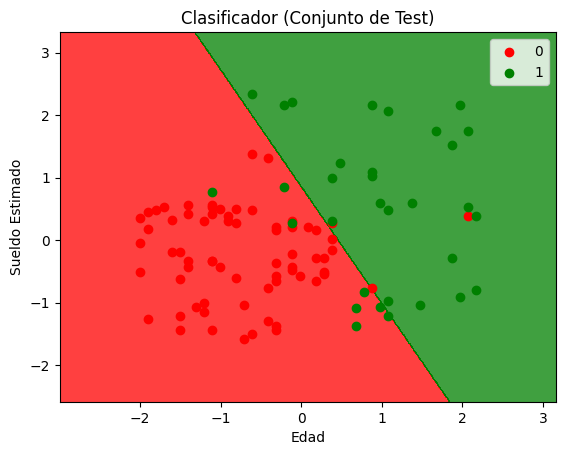

In [ ]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()


**<h2 style="color: #007ACC;">Créditos</h2>**

---

**Docente:** Andrés Felipe Florez Olivera

**Universidad Pedagógica y Tecnológica de Colombia** - *Diplomado en Data Science: Aplicaciones con Machine Learning - Cohorte II - 2024*


---